In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.optimize import curve_fit

# Hands on exercises
### Barabási-Albert model

In [3]:
G = nx.barabasi_albert_graph(n=100,m=1)

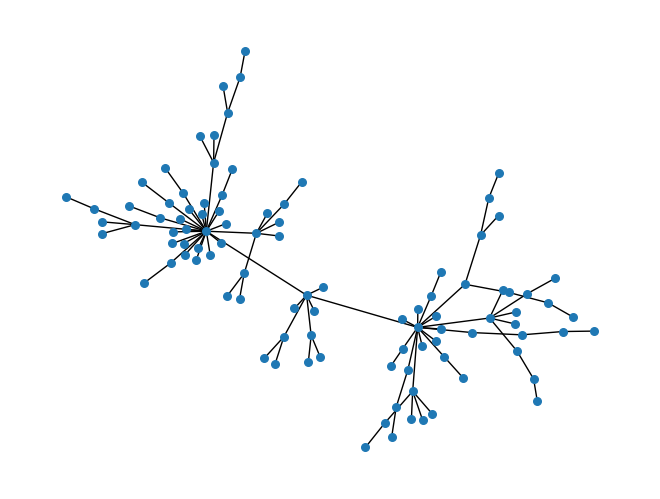

In [4]:
nx.draw(G,node_size=30)

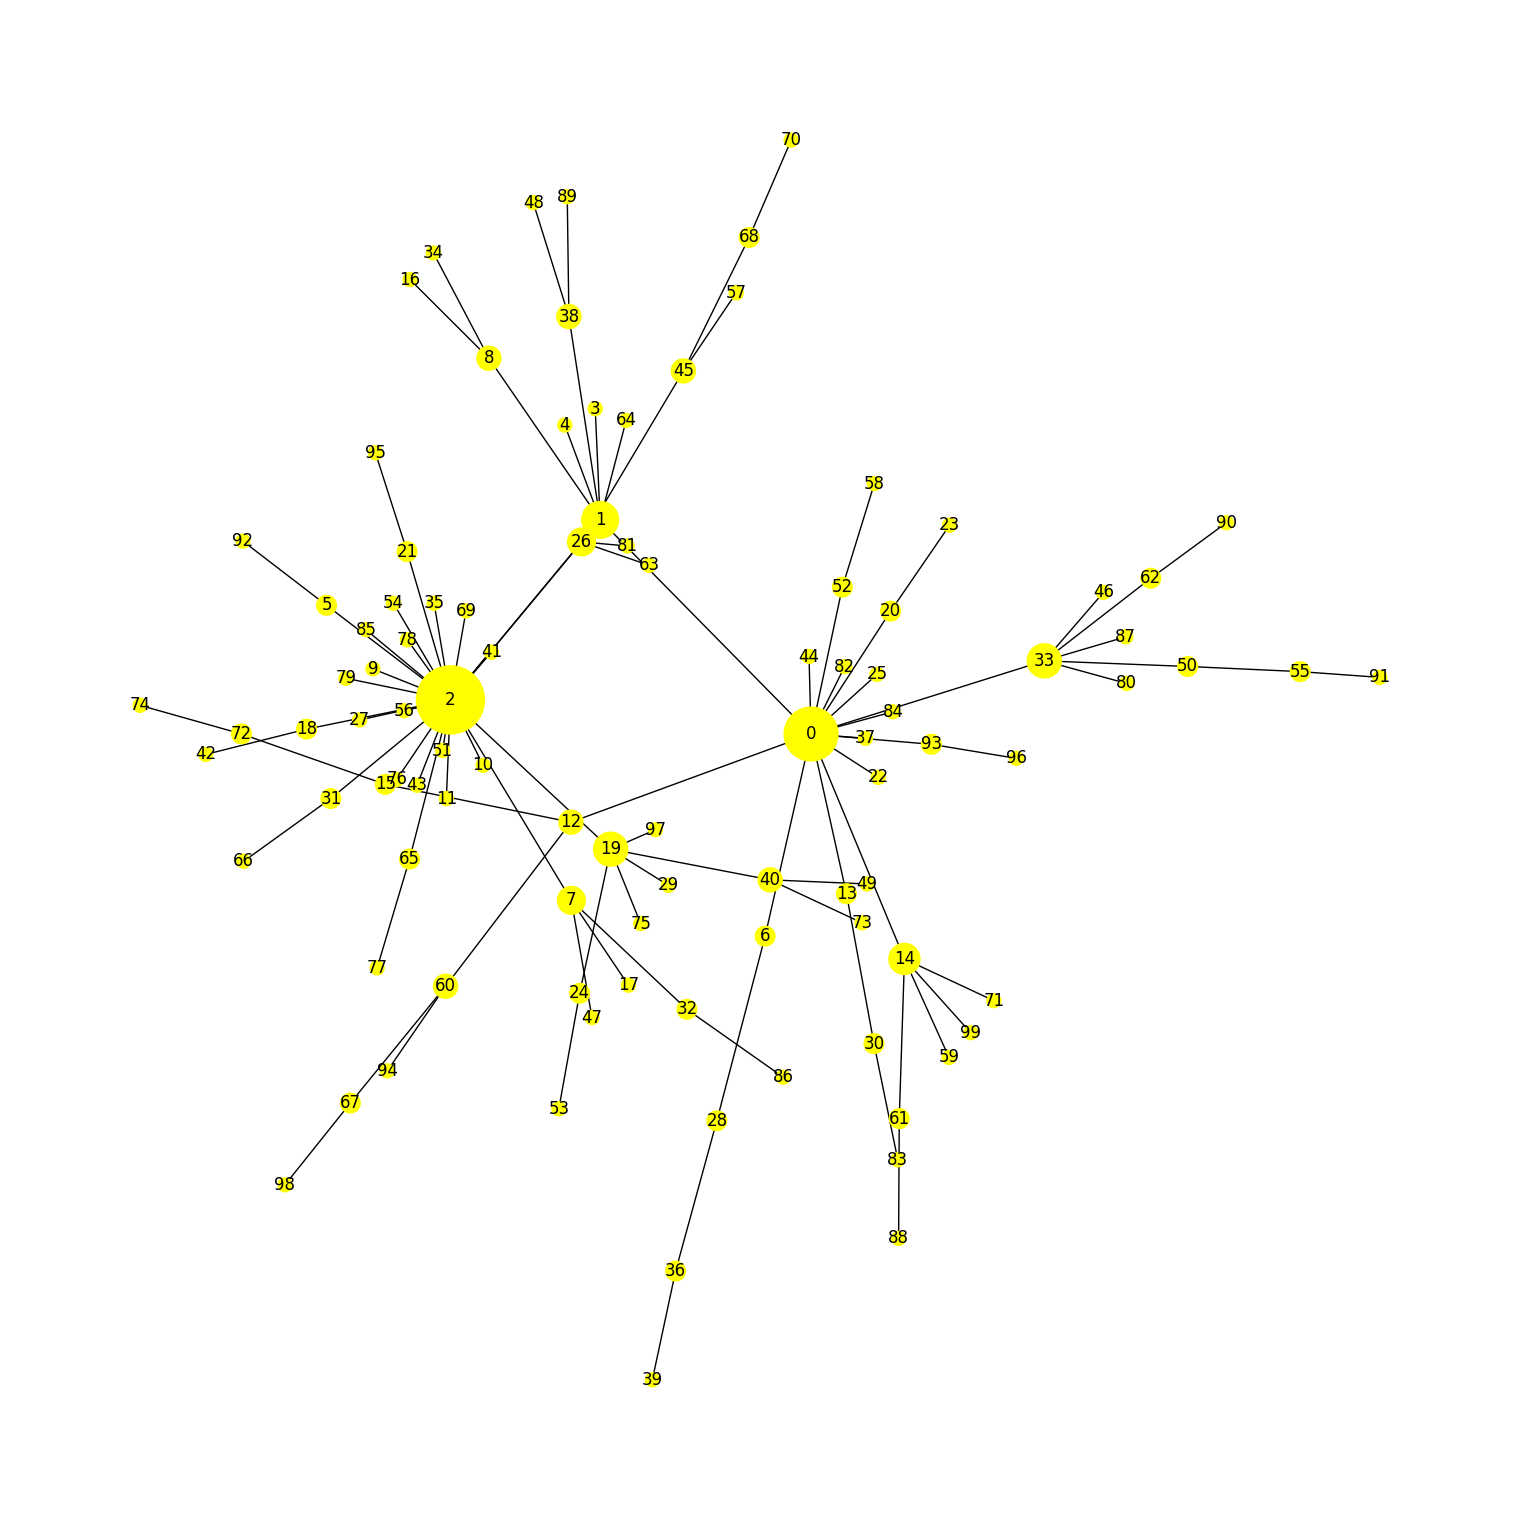

In [5]:
d = dict(G.degree)

plt.figure(figsize=(15,15))
nx.draw(G, nodelist=d.keys(), node_size=[v * 100 for v in d.values()],with_labels=True,node_color='yellow')
plt.show()

### Barabási-Albert model, $m=2$

In [6]:
G = nx.barabasi_albert_graph(n=100,m=2)

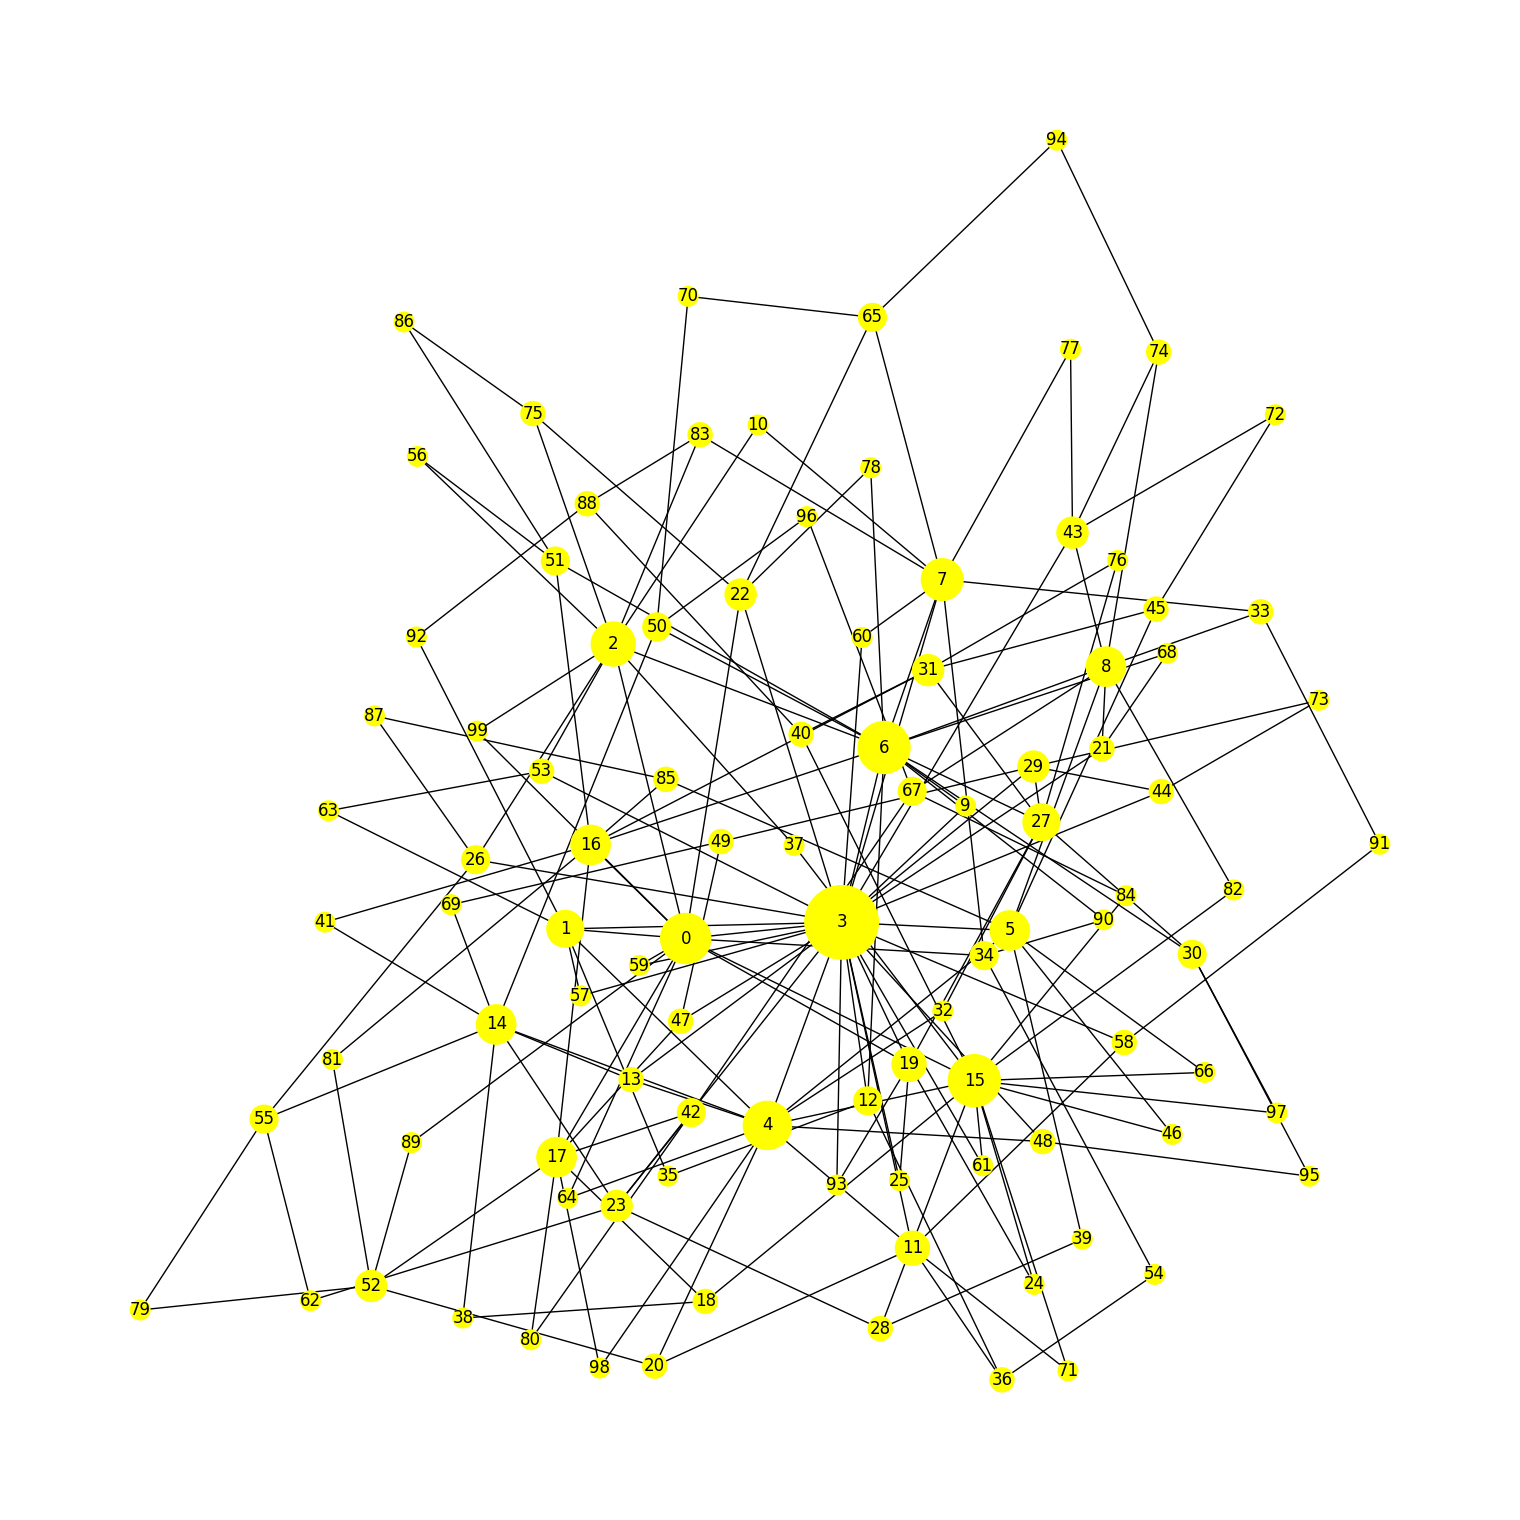

In [7]:
d = dict(G.degree)

plt.figure(figsize=(15,15))
nx.draw(G, nodelist=d.keys(), node_size=[v * 100 for v in d.values()],with_labels=True,node_color='yellow')
plt.show()

In [8]:
G = nx.barabasi_albert_graph(n=10000,m=2)
max_degree = max(list(dict(G.degree).values()))
max_degree

291

### Degree distribution

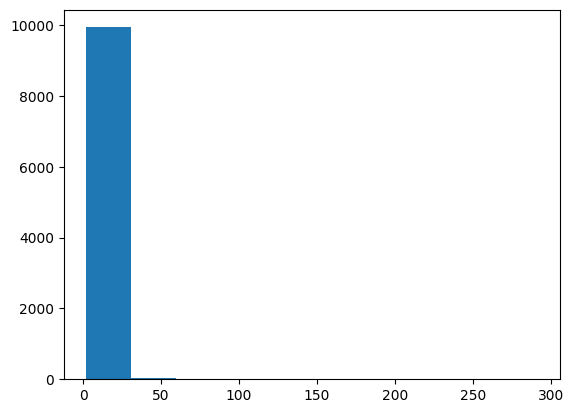

In [9]:
plt.hist(list(dict(G.degree).values()));

<BarContainer object of 291 artists>

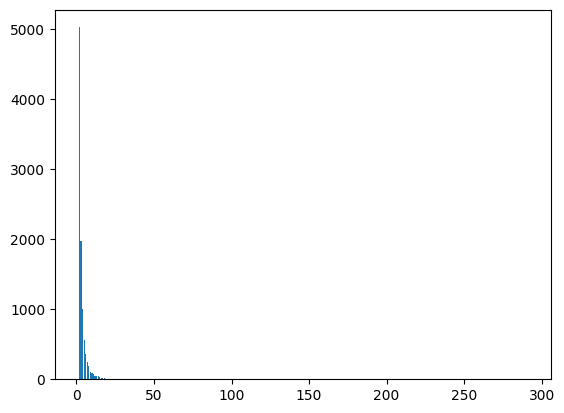

In [10]:
#bins and position for degree distribution
# bins has one more values (telegraph post)
bins = np.arange(max_degree+1) + 0.5
pos = np.arange(max_degree) +1
#histogram calculation
h = np.histogram(list(dict(G.degree).values()),bins=bins)
plt.bar(pos,h[0])

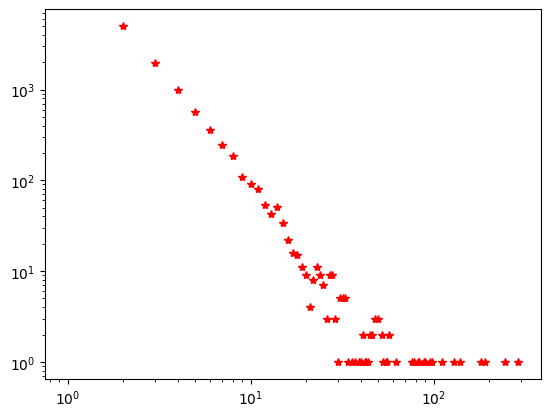

In [11]:
plt.loglog(pos,h[0],"r*")
plt.show()

In [12]:
def lin(x,a,b):
    return a*x+b

In [13]:
cond = h[0] > 0
fitdata = curve_fit(lin, np.log(pos[cond]), np.log(h[0][cond]))
print(fitdata)

(array([-1.9207097 ,  8.42068685]), array([[ 0.01214453, -0.04222388],
       [-0.04222388,  0.15956643]]))


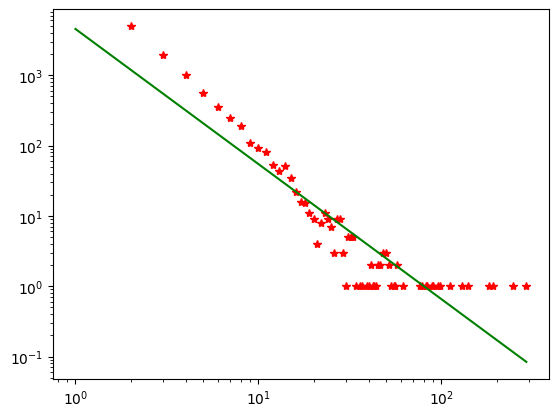

In [14]:
plt.loglog(pos,h[0],"r*")
plt.loglog(pos,pos**fitdata[0][0]*np.exp(fitdata[0][1]),"g-")
plt.show()

### Cumulative distribution

In [15]:
bins = np.arange(max_degree+1) + 0.5
pos = np.arange(max_degree) +1
h = np.histogram(list(dict(G.degree).values()),bins=bins)
hcum = np.zeros_like(h[0])
for i in range(len(hcum)):
    hcum[i] = h[0][i:].sum()

In [16]:
fitdata = curve_fit(lin, np.log(pos), np.log(hcum))
print(fitdata)

(array([-1.79616603, 10.31946061]), array([[ 0.00013297, -0.00062311],
       [-0.00062311,  0.00304338]]))


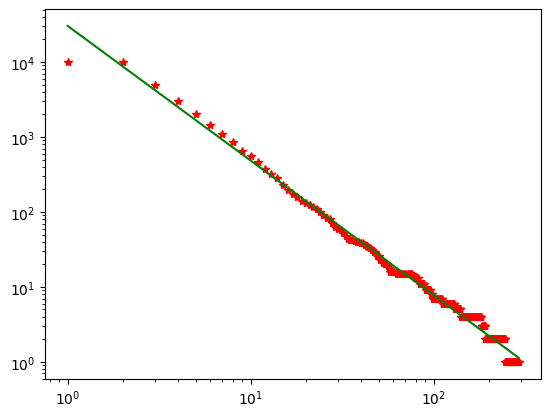

In [17]:
plt.loglog(pos,hcum,"r*")
plt.loglog(pos,pos**fitdata[0][0]*np.exp(fitdata[0][1]),"g-")
plt.show()

### Logarithmic binning

In [18]:
lbins = np.logspace(np.log10(0.9), np.log10(max_degree+1),15)
lpos = (lbins[1:]*2 + lbins[:-1])/3
lbins

array([  0.9       ,   1.36022163,   2.05578098,   3.10701973,
         4.69581716,   7.09705786,  10.72619068,  16.2111073 ,
        24.50077645,  37.02942898,  55.96470029,  84.58266207,
       127.83462944, 193.20380896, 292.        ])

In [19]:
h = np.histogram(list(dict(G.degree).values()),bins=lbins,density=True)

In [20]:
cond = h[0] > 0
fitdata = curve_fit(lin, np.log(lpos[cond]), np.log(h[0][cond]))
print(fitdata)

(array([-2.61864003,  1.26289962]), array([[ 0.00300167, -0.00924226],
       [-0.00924226,  0.03562548]]))


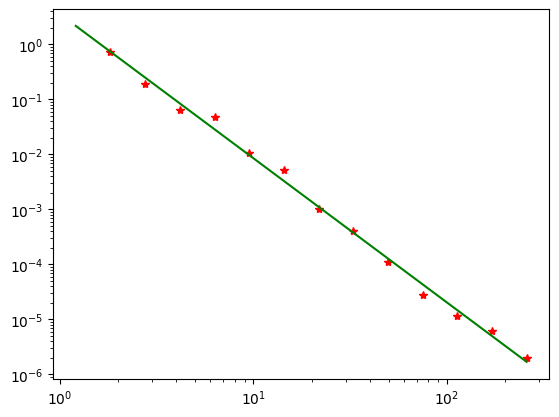

In [21]:
plt.loglog(lpos,h[0],"r*")
plt.loglog(lpos,lpos**fitdata[0][0]*np.exp(fitdata[0][1]),"g-")
plt.show()

In [22]:
cond = lpos>9
fitdata = curve_fit(lin, np.log(lpos[cond]), np.log(h[0][cond]))
print(fitdata)

(array([-2.66748742,  1.46046552]), array([[ 0.00772504, -0.03016673],
       [-0.03016673,  0.12658753]]))


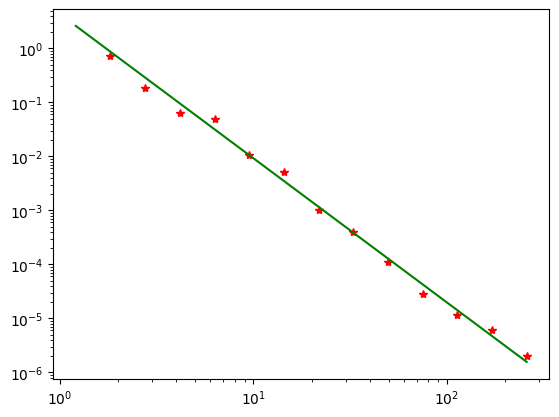

In [23]:
plt.loglog(lpos,h[0],"r*")
plt.loglog(lpos,lpos**fitdata[0][0]*np.exp(fitdata[0][1]),"g-")
plt.show()

### Hands-on exercise
 1. Use the `inf-openflights` datafile
   * plot the histogram, using all above three methods
   * fit a power law function to the degree distribution, if you judge it necessary apply a range restriction


In [24]:
G = nx.read_edgelist('inf-openflights.edges', comments='%', create_using=nx.DiGraph())

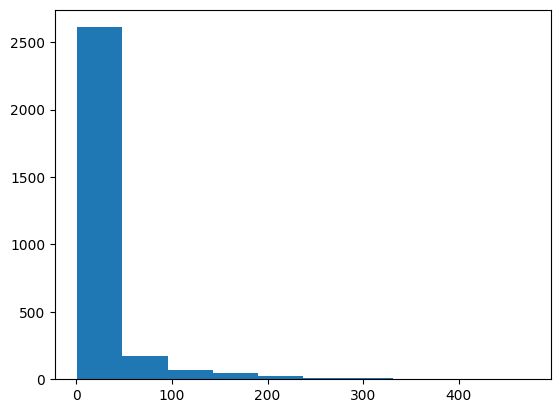

In [25]:
# method 1 

plt.hist(list(dict(G.degree).values()));

(array([-0.74894564,  8.62772936]), array([[ 0.0001434 , -0.00052019],
       [-0.00052019,  0.00200918]]))


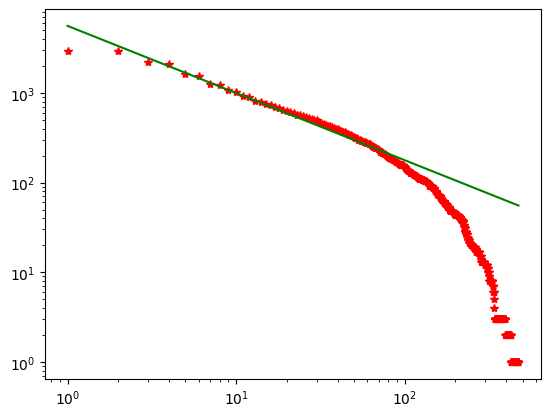

In [39]:
# method 2: cumulative distribution

max_degree = max(list(dict(G.degree).values()))
bins = np.arange(max_degree+1) + 0.5
pos = np.arange(max_degree) +1
h = np.histogram(list(dict(G.degree).values()),bins=bins)
hcum = np.zeros_like(h[0])
for i in range(len(hcum)):
    hcum[i] = h[0][i:].sum()
cond =  (pos < 100)
fitdata = curve_fit(lin, np.log(pos[cond]), np.log(hcum[cond]))
print(fitdata)

plt.loglog(pos,hcum,"r*")
plt.loglog(pos,pos**fitdata[0][0]*np.exp(fitdata[0][1]),"g-")
plt.show()

In [27]:
# method 3: logarithmic binning
lbins = np.logspace(np.log10(0.9), np.log10(max_degree+1),15)
lpos = (lbins[1:]*2 + lbins[:-1])/3
lbins

array([  0.9       ,   1.40811436,   2.2030956 ,   3.4469006 ,
         5.39292246,   8.43761281,  13.20124858,  20.65429737,
        32.31512515,  50.55932401,  79.10367771, 123.76336016,
       193.63662679, 302.95834879, 474.        ])

In [28]:
h = np.histogram(list(dict(G.degree).values()),bins=lbins,density=True)

In [29]:
cond = h[0] > 0
fitdata = curve_fit(lin, np.log(lpos[cond]), np.log(h[0][cond]))
print(fitdata)

(array([-1.35339041, -1.19160633]), array([[ 0.02150672, -0.06717786],
       [-0.06717786,  0.27985653]]))


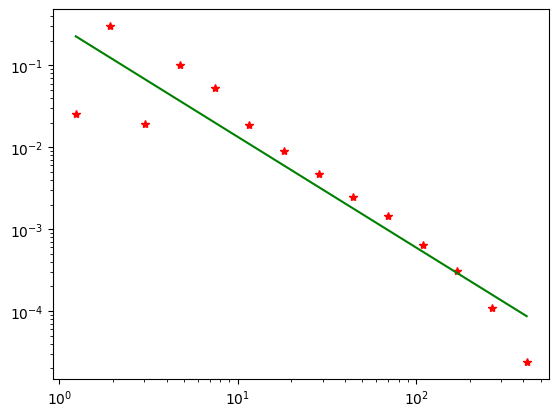

In [30]:
plt.loglog(lpos,h[0],"r*")
plt.loglog(lpos,lpos**fitdata[0][0]*np.exp(fitdata[0][1]),"g-")
plt.show()

 2. Open the supplied book (Harry Potter and the Sorcerer's stone)
   * read the file and create a list of words
   * if you are feeling brave you may identify the stem of the words. (e.g. go, goes, went, gone = "go")
   * count the occurence of the different words
   * create a Zipf's plot, by showing the count of the different words as function of their rank
   * fit a power law to this function (here also feel free to restrict the fit range)

In [31]:
import re
from nltk.stem import PorterStemmer

# Read the file
with open('HP1.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Convert to lowercase and extract words
# This removes punctuation and converts to lowercase
words = re.findall(r'\b[a-zA-Z]+\b', text.lower())

# Apply stemming (go, goes, went, gone -> go)
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in words]

# After loading, you can check:
print(f"Total words: {len(words)}")
print(f"First 20 words: {words[:20]}")
print(f"Unique words: {len(set(words))}")

Total words: 84064
First 20 words: ['the', 'boy', 'who', 'lived', 'mr', 'and', 'mrs', 'dursley', 'of', 'number', 'four', 'privet', 'drive', 'were', 'proud', 'to', 'say', 'that', 'they', 'were']
Unique words: 5730


In [32]:
from collections import Counter

# Count word frequencies
word_counts = Counter(stemmed_words)

# Get frequencies sorted by count (most frequent first)
frequencies = sorted(word_counts.values(), reverse=True)

# Create rank array (1, 2, 3, ...)
ranks = np.arange(1, len(frequencies) + 1)

# Convert to numpy arrays for easier manipulation
ranks = np.array(ranks)
frequencies = np.array(frequencies)

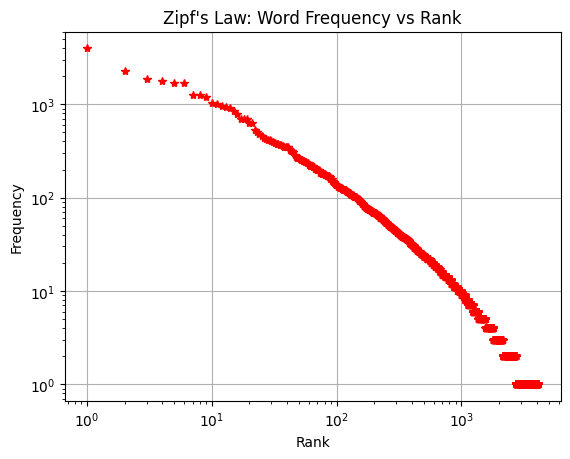

In [33]:
# Create the Zipf's plot (similar to your loglog plots)
plt.loglog(ranks, frequencies, "r*", label="Word frequencies")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Zipf's Law: Word Frequency vs Rank")
plt.grid(True)
plt.show()

Power law exponent: -1.457442656019628


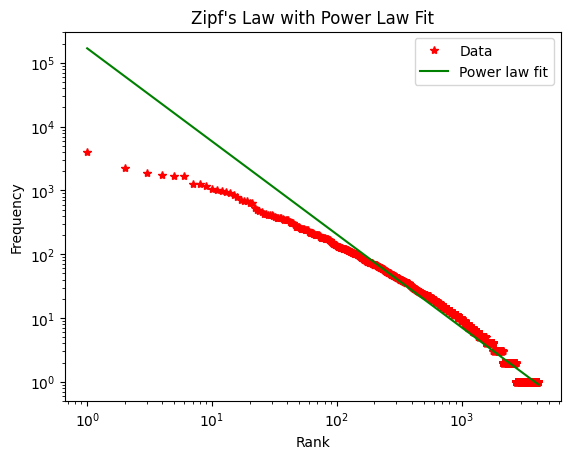

In [34]:
# Apply range restriction (like you did with lpos>9)
# Only fit for ranks > 10 to avoid noise in the tail
cond = (frequencies > 0) & (ranks > 10)
fitdata = curve_fit(lin, np.log(ranks[cond]), np.log(frequencies[cond]))
print(f"Power law exponent: {fitdata[0][0]}")

# Plot with fitted line
plt.loglog(ranks, frequencies, "r*", label="Data")
plt.loglog(ranks, ranks**fitdata[0][0]*np.exp(fitdata[0][1]), "g-", label="Power law fit")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Zipf's Law with Power Law Fit")
plt.legend()
plt.show()

In [35]:
import plotly.graph_objects as go
import plotly.express as px

# Get word-frequency pairs sorted by frequency
word_freq_pairs = word_counts.most_common()
words, frequencies = zip(*word_freq_pairs)
ranks = list(range(1, len(words) + 1))

# Create interactive plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=ranks,
    y=frequencies,
    mode='markers',
    marker=dict(size=8, color='red'),
    text=[f"Word: {word}<br>Rank: {rank}<br>Frequency: {freq}" 
           for word, rank, freq in zip(words, ranks, frequencies)],
    hovertemplate='%{text}<extra></extra>'
))

fig.update_layout(
    title="Zipf's Law: Interactive Word Frequency vs Rank",
    xaxis_title="Rank",
    yaxis_title="Frequency",
    xaxis_type="log",
    yaxis_type="log"
)

fig.show()